In [1]:
import pyroot_module as pr

Welcome to JupyROOT 6.19/01
Delphes classes imported


### Importing signal and background data using the `Data` class

In [2]:
signal_path = "/path_to_signal_data/*.root"
background_path = "/path_to_background_data/*.root"

signal = pr.Data(signal_path, "signal")
background = pr.Data(background_path, "background")

we can see the number of events with the `number_of_events` attribute

In [3]:
ns = signal.number_of_events
nb = background.number_of_events

print "signal number of events: ",ns
print "background number of events: ",nb

signal number of events:  50000
background number of events:  48974


### Creating and filling histograms 

We can see the histograms than can be created using the `DisplayHistograms` method on some Data class instance

In [4]:
signal.DisplayHistograms()

hPT[j]: Transverse momentum
hEta[j]: jets pseudorapidity
hDeltaEta[j]: Difference on pseudorapidity between MET and jets
hDeltaPhiMetJet[j]: Difference on the azimuthal angle between the Met and jets
hDeltaPhi: Difference on the azimuthal angle between the two leading jets
hMass: Invariant mass for the two leading jets
hPTdiv: Ratio between the transverse momentum of the two leading jets
hMetET: MET transverse energy
hMetPhi: Azimuthal angle of the MET
hDeltaEtaJet: Difference on pseudorapidity between the two leading jets
hDeltaPhiMax: Difference on the azimuthal angle between the two jets with greatest invariant mass
hMassMax: Invariant mass for the jets with greatest invariant mass
hPTdivMax: Ratio between the transverse momentum of the jets with greatest invariant mass
hDeltaEtaJetMax: Difference on pseudorapidity between the jets with greatest invariant mass


We can see/change some histogram features through the `<histName>_feature` attribute, which contains the number of bins, lower and upper limits, respectively  

In [5]:
print "hMass number of bins: ",signal.hPT_feature[0]
print "hMass lower limit: ",signal.hPT_feature[1]
print "hMass upper limit: ",signal.hPT_feature[2]

hMass number of bins:  100
hMass lower limit:  0.0
hMass upper limit:  1800


Let's initialize the histograms for the signal and background data 

In [6]:
signal.Histograms()
background.Histograms()

We can fill the histograms using the `Fill()` method. By default, the method filters jets with $P_T > 30 \: \text{GeV}$ and $|\eta| < 5$. Additionally, it filters events with at least two jets in opposite hemispheres.

In [8]:
signal.Fill()
background.Fill()

To visualize some histogram, we can use the `PlotHistogram()` method. By default, it will create a folder named `Histograms` in the current directory and save the plot there. To change this path use the kwarg `savePath`.

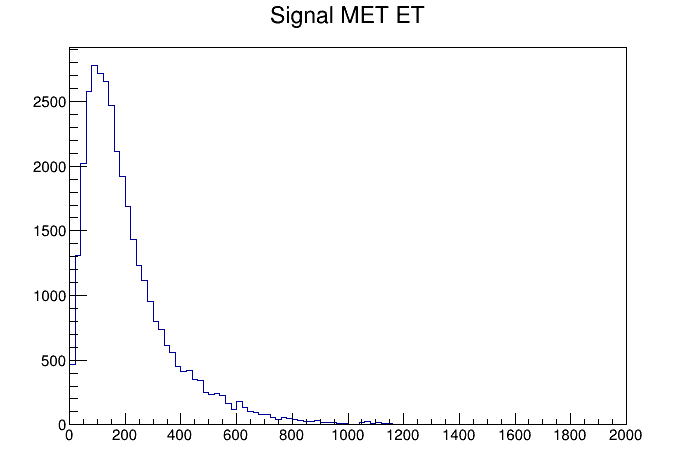

In [9]:
# plotting the MET transverse energy for the signal data
pr.PlotHisto(signal.hMetET, title="Signal MET ET", save=False)

Alternative, we can plot two histograms in the same canvas using the `PlotHistograms()` method:

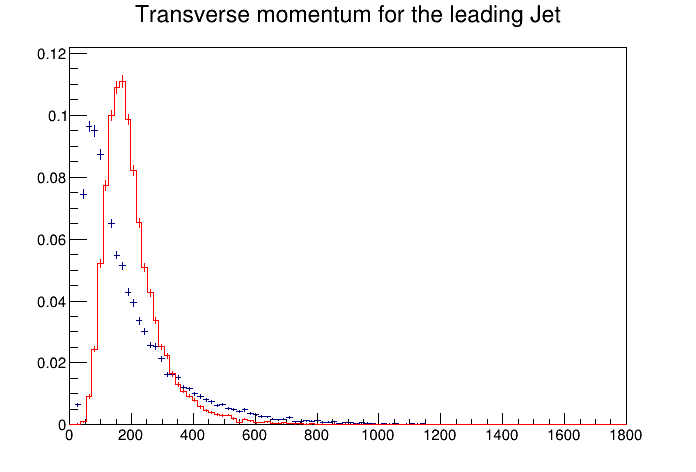

In [10]:
# plotting the tranverse momentum for the leading jets in signal and background data
hs = signal.hPT[0]
hb = background.hPT[0]

pr.PlotHistos(hs, hb, save=False, title="Transverse momentum for the leading Jet")

we can obtain a significance histogram made out of hs and hb using the `Significance` method:

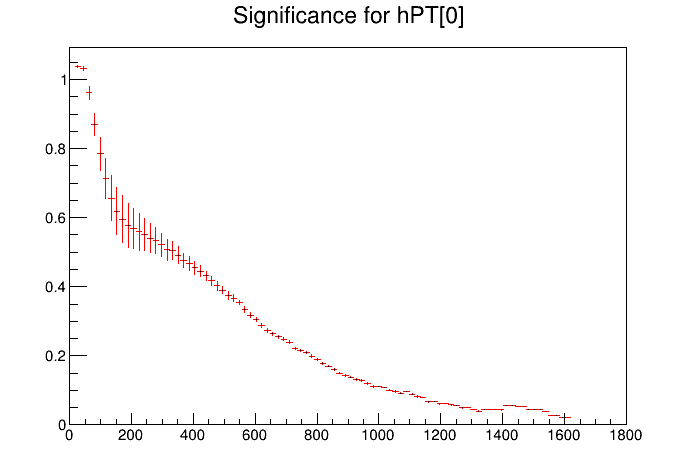

In [11]:
hz = pr.Significance(hs, hb, ns=ns, nb=nb)

pr.PlotHisto(hz, title="Significance for hPT[0]" ,save=False)

### Applying cuts

The number of events that pass some cut are store in the `cuts` attribute (there is a latex-like string of the cuts in the `cuts_keys` attribute): 

In [12]:
print "number of signal events that pass some cut (only default cuts)"
signal.cuts

number of signal events that pass some cut (only default cuts)


{'cut0': 50000L,
 'cut1': 39474,
 'cut2': 17312,
 'cut3': 0,
 'cut4': 0,
 'cut5': 0,
 'cut6': 0,
 'cut7': 0}

we can activate/deactivate an individual cut or modify its value

In [13]:
signal.Fill(h_cut=True, h_cut_value=500)
background.Fill(h_cut=True, h_cut_value=500)

In [14]:
print "number of signal events that pass some cut (with an additional cut)"
signal.cuts

number of signal events that pass some cut (with an additional cut)


{'cut0': 50000L,
 'cut1': 39474,
 'cut2': 17312,
 'cut3': 0,
 'cut4': 0,
 'cut5': 0,
 'cut6': 3423,
 'cut7': 0}

To apply all the cuts at once we can set the `apply_cut` (`False` by default) attribute to `True` before calling the `Fill` method:

In [15]:
pr.Data.apply_cut = True

signal.Fill()
background.Fill()

In [16]:
print "number of signal events that pass some cut (all cuts)"
signal.cuts

number of signal events that pass some cut (all cuts)


{'cut0': 50000L,
 'cut1': 39474,
 'cut2': 17312,
 'cut3': 1541,
 'cut4': 351,
 'cut5': 118,
 'cut6': 116,
 'cut7': 30}

We can see the cutflow with the `CutFlow` method:

In [17]:
t1, t2 = pr.CutFlow(signal.cuts, background.cuts, signal.cuts_keys, ns=ns, nb=nb)

In [18]:
t1

,${\textbf{[bold]: GeV}}$,S,B,Z,Z_w
cut0,"${\mathbf{P_T>30}}$, $|\eta(j)|<5$",50000.0,48974.0,158.931303,234.415327
cut1,Number of jets $\geq$ 2,39474.0,38487.0,141.374941,208.686058
cut2,$\eta (j_1) * \eta (j_2) < 0$,17312.0,16125.0,94.674624,140.868625
cut3,"$|\Delta \eta (j_1,j_2)| > 4$",1541.0,1514.0,27.880274,41.100243
cut4,"$\mathbf{M(j_1,j_2) >}1000$",351.0,463.0,12.302544,17.283618
cut5,$\mathbf{MET >}200$,118.0,195.0,6.669754,9.067169
cut6,$\mathbf{H_t >}200$,116.0,194.0,6.588357,8.941813
cut7,"|$\Delta\phi(\text{MET},j)| > 0.5$",30.0,37.0,3.665083,5.203298


In [19]:
t2

,${\textbf{[bold]: GeV}}$,s_c,s_r,b_a,b_r
cut0,"${\mathbf{P_T>30}}$, $|\eta(j)|<5$",1,1,1,1
cut1,Number of jets $\geq$ 2,0.78948,0.78948,0.785866,0.785866
cut2,$\eta (j_1) * \eta (j_2) < 0$,0.34624,0.438567,0.329256,0.418973
cut3,"$|\Delta \eta (j_1,j_2)| > 4$",0.03082,0.0890134,0.0309144,0.0938915
cut4,"$\mathbf{M(j_1,j_2) >}1000$",0.00702,0.227774,0.009454,0.305812
cut5,$\mathbf{MET >}200$,0.00236,0.336182,0.0039817,0.421166
cut6,$\mathbf{H_t >}200$,0.00232,0.983051,0.00396129,0.994872
cut7,"|$\Delta\phi(\text{MET},j)| > 0.5$",0.0006,0.258621,0.000755503,0.190722
